In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Gaussian peak problem description

In [3]:
problem = ctb.CentralTendencyGaussianPeakProblem5N()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

In [4]:
distribution

class=ComposedDistribution name=ComposedDistribution dimension=5 copula=class=IndependentCopula name=IndependentCopula dimension=5 marginal[0]=class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.5] sigma=class=Point name=Unnamed dimension=1 values=[0.15] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5 marginal[1]=class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.5] sigma=class=Point name=Unnamed dimension=1 values=[0.15] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5 marginal[2]=class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.5] sigma=class=Point name=Unnamed dimension=1 values=[0.15] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5 marginal[3]=class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.5] sigma=class=Point name=Unnamed dimension=1 values=[0.15] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5 marginal[4]=class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.5] sigma=class=Point name=Unnamed dimension=1 values=[0.15] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5

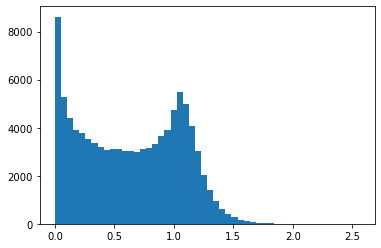

In [5]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(100000)
plt.hist(np.array(output_sample).flatten(), 50);

# Benchmark

In [6]:
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**13, distribution, None)

In [7]:
#x_bench_sizes = list(range(5, 100, 5)) + list(range(100, 200, 50))
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 250, 50))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [8]:
bench.scale_coefficient = 0.5
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
df_benchmark.to_csv('results/ct_benchmark_{}.csv'.format(problem_name), index=False)

START: problem=Gaussian Peak 5D (normal input) | method=kernel herding
START: problem=Gaussian Peak 5D (normal input) | method=support points
START: problem=Gaussian Peak 5D (normal input) | method=sobol
DONE: problem=Gaussian Peak 5D (normal input) | method=sobol
DONE: problem=Gaussian Peak 5D (normal input) | method=support points
DONE: problem=Gaussian Peak 5D (normal input) | method=kernel herding


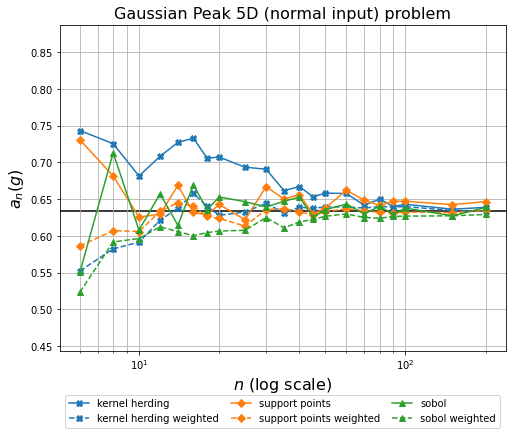

In [9]:
sfile = 'figures/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);

In [10]:
 1 / (300 ** (1 / 5))

0.3195771718380609